## Imports

In [263]:
import numpy as np 
import numpy.linalg as LA
import matplotlib.pyplot as plt 
import random 
import math 

## Generating Data

I'm gonna make a neural net to fit a curve to some generated data... LET'S GOOOO

In [264]:
# Creating data from a third degree polynomial
f_true = lambda x: 0.2*x**3 - 0.7*x**2 + 1.4*x + 2

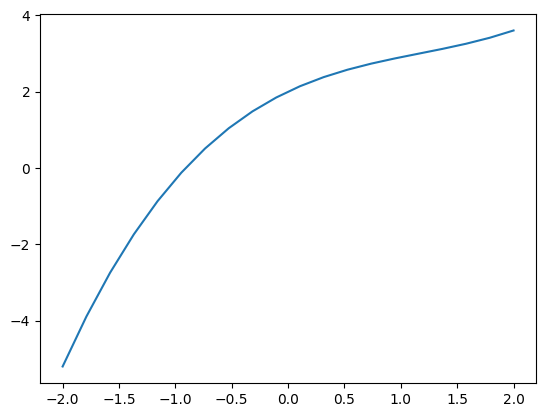

In [265]:
x = np.linspace(-2,2,20)
plt.plot(x, f_true(x))

In [266]:
np.random.seed(2)
y = f_true(x) + np.random.standard_normal(20)
y

array([-5.61675785, -3.94913751, -4.87916154, -0.09881652, -2.66347495,
       -0.96637195,  1.0112354 , -0.20519478,  0.42383813,  0.93563446,
        2.6912995 ,  4.67080548,  2.61363445,  1.61360976,  3.40717321,
        2.39687135,  3.09835019,  4.42766196,  2.66189724,  3.60902525])

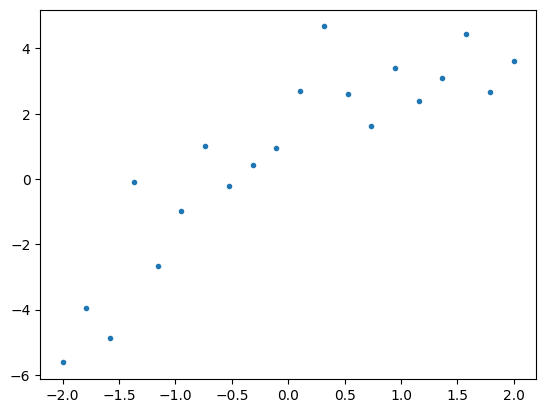

In [267]:
plt.plot(x, y, '.')

## Modeling Like A Really Good Looking Model...

We want to approximate the following function

$$
f(x) = a_3x^3 + a_2x^2 + a_1x + a_0
$$

So we have four parameters and a set of training data that we can work with. To train the model, let's first instantiate some values for our parameters. 

Say we start with the following:

$$
f(x) = x^3 - x^2 + 2x + 3
$$

Let's go from here.

In [268]:
a3 = 1
a2 = -1
a1 = 2
a0 = 3
f_pred = lambda x, a3, a2, a1, a0: a3*x**3 + a2*x**2 + a1*x + a0

In [269]:
loss = lambda y, x, a3, a2, a1, a0: LA.norm(y, 2) - LA.norm(f_pred(x, a3, a2, a1, a0), 2)

In [270]:
# recall: f_true = lambda x: 0.2*x**3 - 0.7*x**2 + 1.4*x + 2

print("random initial params loss: ", loss(y, x, a3, a2, a1, a0))
print("true params loss: ", loss(y, x, 0.2, -0.7, 1.4, 2))

random initial params loss:  -13.830755636044147
true params loss:  1.5304624468512529


Let's define our varaibales once more

In [271]:
# y-coordinates of our "data"
y

array([-5.61675785, -3.94913751, -4.87916154, -0.09881652, -2.66347495,
       -0.96637195,  1.0112354 , -0.20519478,  0.42383813,  0.93563446,
        2.6912995 ,  4.67080548,  2.61363445,  1.61360976,  3.40717321,
        2.39687135,  3.09835019,  4.42766196,  2.66189724,  3.60902525])

In [272]:
# x-coordinates of our "data"
x

array([-2.        , -1.78947368, -1.57894737, -1.36842105, -1.15789474,
       -0.94736842, -0.73684211, -0.52631579, -0.31578947, -0.10526316,
        0.10526316,  0.31578947,  0.52631579,  0.73684211,  0.94736842,
        1.15789474,  1.36842105,  1.57894737,  1.78947368,  2.        ])

So we want to fit a curve that minimizes the least squares error function... Let's do that now that I'm nice w/ neural nets (I'm mid)

I'm going to lab this out on some paper first, that way I konw my matrix shapes and all... gimme a second.

In [273]:
print(x.shape)
print(y.shape)

(20,)
(20,)


We will need a construction with a 20x4 design matrix and a 4x1 vector of coeffecients we are estimating. This will yield a 20x1 prediction vector.

In [274]:
def designMatrix(data: np.array): 
    X = np.ones((20,4))
    for idx, value in enumerate(data):
        for col_num in range(len(X[idx])):
            X[idx][col_num] = data[idx]**col_num

    return X

X = designMatrix(x)
X[1:5]

array([[ 1.        , -1.78947368,  3.20221607, -5.73028138],
       [ 1.        , -1.57894737,  2.49307479, -3.93643388],
       [ 1.        , -1.36842105,  1.87257618, -2.56247266],
       [ 1.        , -1.15789474,  1.34072022, -1.55241289]])

In [275]:
A = np.array([a0, a1, a2, a3])
X@A

array([-13.        ,  -9.51144482,  -6.58740341,  -4.17189095,
        -2.20892258,  -0.64251349,   0.58332118,   1.52456626,
         2.23720659,   2.777227  ,   3.20061233,   3.56334743,
         3.92141712,   4.33080624,   4.84749964,   5.52748214,
         6.42673859,   7.60125383,   9.10701268,  11.        ])

-13.0
-9.511444817028723
-6.587403411576032


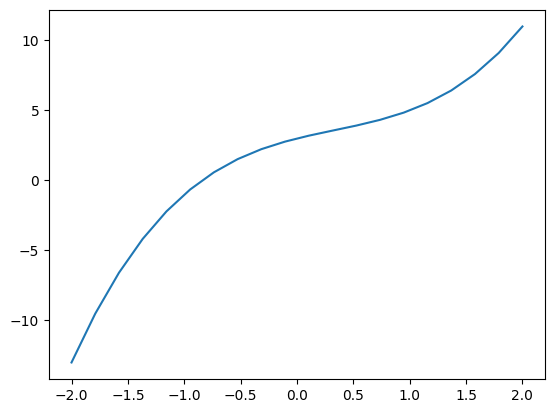

In [276]:
plt.plot(x, f_pred(x, a3, a2, a1, a0))
print(f_pred(x, a3, a2, a1, a0)[0])
print(f_pred(x, a3, a2, a1, a0)[1])
print(f_pred(x, a3, a2, a1, a0)[2])

# SEEMS LIKE WE DID OUR MATRIX MATH CORRECTLY!
# LET'S GOOOOOO

In [277]:
print(X[1:5])
print(X.shape)

[[ 1.         -1.78947368  3.20221607 -5.73028138]
 [ 1.         -1.57894737  2.49307479 -3.93643388]
 [ 1.         -1.36842105  1.87257618 -2.56247266]
 [ 1.         -1.15789474  1.34072022 -1.55241289]]
(20, 4)


In [278]:
print(A)
print(A.shape)

[ 3  2 -1  1]
(4,)


In [279]:
print(X@A)
print((X@A).shape)

[-13.          -9.51144482  -6.58740341  -4.17189095  -2.20892258
  -0.64251349   0.58332118   1.52456626   2.23720659   2.777227
   3.20061233   3.56334743   3.92141712   4.33080624   4.84749964
   5.52748214   6.42673859   7.60125383   9.10701268  11.        ]
(20,)


We have all of our matricies set up, now we just have to impliment the backpropogation

$$
a_i \leftarrow a_i - \beta\frac{\partial L}{\partial a_i}
$$

In [280]:
β = 0.01
# I lied, we need a vector of our loss derivatives
# The vector should 
def dLdA(y_true:np.array, y_pred:np.array, x: np.array):
    Z = np.ones(4) # length of our vector of coefficients
    # Want Z to be a 4x1 vector where each entry is the partial derivative of our Loss function in respect to our coefficient
    for i in range(len(Z)):
        entry_i = 0
        for j in range(len(y_pred)): # I could also just hardcode 20 here...
            entry_i = entry_i + -2 * (y_true[j] - y_pred[j]) * x[j]**i # -2*delta_y[j]*x[j]**power_i
        Z[i] = entry_i

    return Z

In [281]:
# This should be our update value!

update = β*dLdA(y, f_pred(x, a3, a2, a1, a0), x)
update

array([0.30688389, 1.48121855, 0.27374982, 4.62779051])

## The Assembly

Our variables are:

1. **X**   -> our design matrix
2. **A**   -> our vector of coeffecients which we wish to optimize
3. **x**   -> x-coords of data
4. **y**   -> y-coords of data

Our important functions are

1. **dLdA**   -> calculates the vector of the derivative of our loss in respect to our coefficients
2. **designMatrix**   -> won't be used in the algorithm, but we used this to obtain our design matrix
3. **f_pred**   -> takes in input data and coefficients, outputs a vector of predicted y values.
4. **loss**   -> takes in a vector of "true" values, input data, and coeffients, outputs a scalar representing loss

In [282]:
a0, a1, a2, a3 = A
print(a0,a1,a2,a3)

3 2 -1 1


In [283]:
maxits = 20000 # Hopefully by this many iterations we have our polynomial
loss_list = [] # we will be keeping track of our loss at each step
y_true = y # renaming one variable for convenience
β = 0.001

a3 = 1
a2 = -1
a1 = 2
a0 = 3

loss = lambda y, x, a3, a2, a1, a0: LA.norm(y, 2) - LA.norm(f_pred(x, a3, a2, a1, a0), 2) 

f_pred = lambda x, a3, a2, a1, a0: a3*x**3 + a2*x**2 + a1*x + a0

A = np.array([a0, a1, a2, a3])

def designMatrix(data: np.array): 
    X = np.ones((20,4))
    for idx, value in enumerate(data):
        for col_num in range(len(X[idx])):
            X[idx][col_num] = data[idx]**col_num

    return X

X = designMatrix(x)

In [284]:
for i in range(maxits):
    a0,a1,a2,a3 = A
    y_pred = X@A
    loss_val = loss(y_true, x, a3, a2, a1, a0)
    loss_list.append(loss_val)
    A = A - β*dLdA(y_true, y_pred, x)

In [285]:
A

array([ 1.85140685,  1.9362367 , -0.7412041 ,  0.0736635 ])

In [286]:
# Compare to true coeff
# f_true = lambda x: 0.2*x**3 - 0.7*x**2 + 1.4*x + 2

Comparing above, our coeffecients are actually kind of close! But what does our plot show?

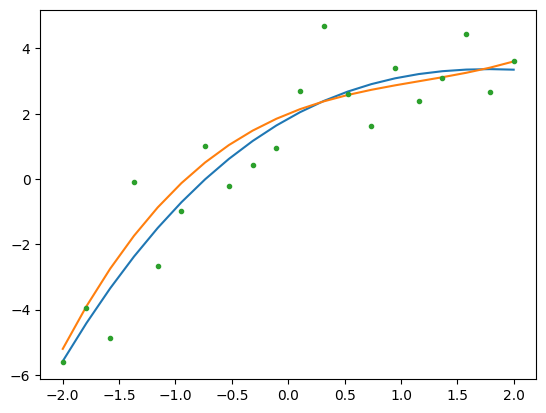

In [287]:
a3, a2, a1, a0 = A

plt.plot(x, f_pred(x, a0, a1, a2, a3), label="predicted")
plt.plot(x, f_true(x), label="true")
plt.plot(x, y, '.', label="data")

AWESOME! WE HAVE DONE IT.

In [290]:
A # values corresponding to a0, a1, a2, and a3

array([ 1.76886417,  1.61814613, -0.70658863,  0.1768411 ])

## Awesomeness (Look here for "final product")

In [291]:
maxits = 20000 # Hopefully by this many iterations we have our polynomial
loss_list = [] # we will be keeping track of our loss at each step
y_true = y # renaming one variable for convenience
β = 0.0001

a3 = 1
a2 = -1
a1 = 2
a0 = 3

loss = lambda y, x, a3, a2, a1, a0: LA.norm(y - f_pred(x, a3, a2, a1, a0), 2)

f_pred = lambda x, a3, a2, a1, a0: a3*x**3 + a2*x**2 + a1*x + a0

A = np.array([a3, a2, a1, a0])

def designMatrix(data: np.array): 
    X = np.ones((20,4))
    for idx, value in enumerate(data):
        for col_num in range(len(X[idx])):
            X[idx][col_num] = data[idx]**col_num

    return X

def dLdA(y_true:np.array, y_pred:np.array, x: np.array):
    Z = np.ones(4) # length of our vector of coefficients
    # Want Z to be a 4x1 vector where each entry is the partial derivative of our Loss function in respect to our coefficient
    for i in range(len(Z)):
        entry_i = 0
        for j in range(len(y_pred)): # I could also just hardcode 20 here...
            entry_i = entry_i + -2 * (y_true[j] - y_pred[j]) * x[j]**i # -2*delta_y[j]*x[j]**power_i
        Z[i] = entry_i

    return Z

X = designMatrix(x)

In [292]:
# f_true = lambda x: 0.2*x**3 - 0.7*x**2 + 1.4*x + 2
A = np.array([0, 0, 0, 0])
maxits = 10000 # Hopefully by this many iterations we have our polynomial
loss_list = [] # we will be keeping track of our loss at each step
y_true = y # renaming one variable for convenience

for i in range(maxits):
    a0,a1,a2,a3 = A
    y_pred = X@A
    loss_val = β*loss(y, x, a3, a2, a1, a0)
    loss_list.append(loss_val*(1/β))
    A = A - β*dLdA(y_true, y_pred, x)

In [293]:
A

array([ 1.85140643,  1.93584791, -0.74120393,  0.07378961])

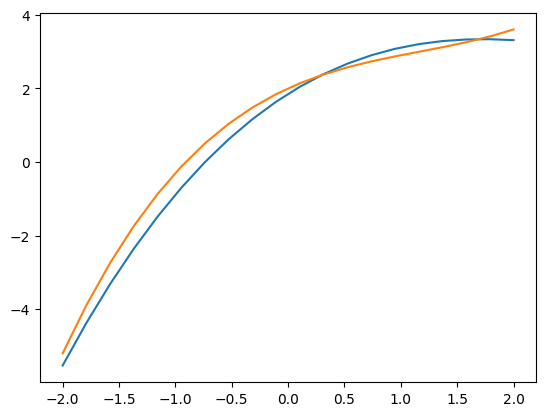

In [294]:
f_model = lambda x: 0.07*x**3 - 0.74*x**2 + 1.93*x + 1.85
plt.plot(x,f_model(x))
plt.plot(x, f_true(x))

Text(0.5, 1.0, 'FUNNY CURVES')

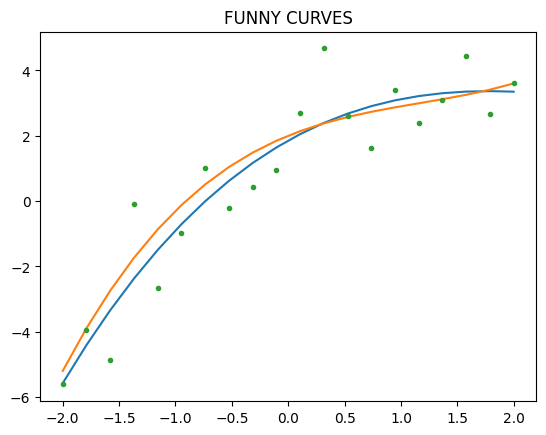

In [298]:
a0, a1, a2, a3 = A

plt.plot(x, f_pred(x, a3, a2, a1, a0), label="predicted")
plt.plot(x, f_true(x), label="true")
plt.plot(x, y, '.', label="data")
plt.title("FUNNY CURVES")



Text(0.5, 1.0, 'LOSS, SO MUCH LOSS')

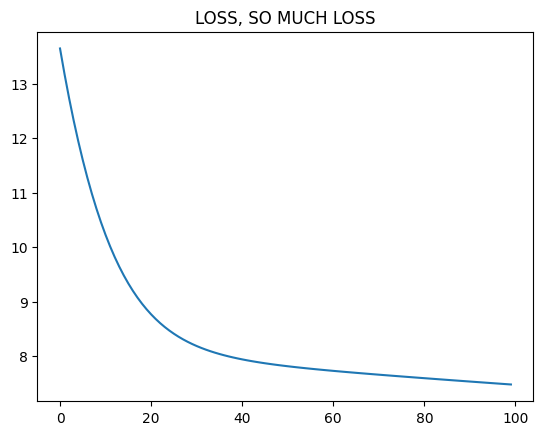

In [297]:
x_axis = np.arange(0, len(loss_list), 1)
plt.plot(x_axis[0:100], loss_list[0:100])
plt.title("LOSS, SO MUCH LOSS")